# **Otimização por Colônia de Formigas**
> A Otimização por Colônia de Formigas, *Ant Colony Optimization* - ACO, é uma técnica inspirada na busca por fonte de alimento realizada por colônias de formigas, a qual é aplicada a problemas discretos de otimização.

> A metáfora central da ACO reside no mecanismo de comunicação indireta através de sinais químicos (feromônios), empregado por muitas espécies de formigas sociais, na busca por fontes de alimentos. As formigas buscam aleatoriamente por fontes de alimento próximas aos seus ninhos, sendo que a “força” da trilha de feromônio cresce rapidamente para fontes próximas e para trilhas mais curtas. As trilhas surgem ao longo do tempo, como uma memória coletiva, formando uma rota entre a colônia e a fonte de alimento (Figura 1).

Figura 1. Depósito de feromônio entre o ninho (N) e a fonte de alimento (F)

![ACO ilustração.png](<attachment:ACO ilustração.png>)

> O presente notebook colab, pretende introduzir à ACO. A codificação foi baseada na biblioteca ACO-Pants e nos exemplos disponíveis em: 
- A Python3 implementation of the Ant Colony Optimization Meta-Heuristic. Disponível em: https://pypi.org/project/ACO-Pants/. Acesso em: 5 abr 2021.
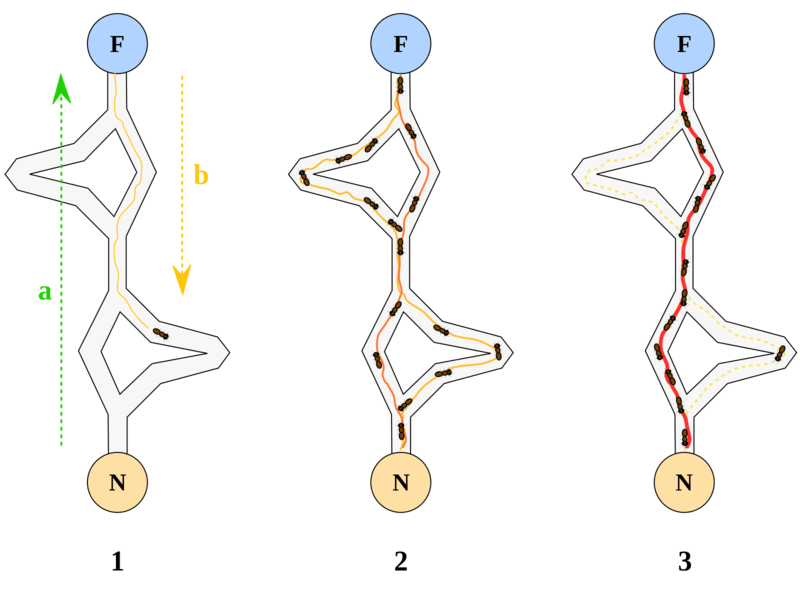

In [ ]:
#[1] Importando pacotes e módulos

# Instalação de ACO-Pants
!pip install ACO-Pants

import pants
import math
import random
import numpy

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ACO-Pants: filename=ACO_Pants-0.5.2-py3-none-any.whl size=18898 sha256=2044ba030d3521bf6e92d04ab147c89ee0b2c189329802110a3cb4eb90b10ace
  Stored in directory: c:\users\uepa\appdata\local\pip\cache\wheels\dd\94\7d\11bc1f8a8dc9395a273e2299e9ed3ea8c5d9a9efb1d2748ff6
Successfully built ACO-Pants


## Problema e solução

> O início da aplicação da ACO envolve a conversão do problema escolhido em um grafo, no qual a rota, indicando a trilha mais intensa de feromônios, corresponde à solução desejada. O objetivo é determinar um percurso otimizado através desse grafo.

> Nesse contexto, a escolha natural é o clássico Problema do Caixeiro Viajante. Este problema consiste em encontrar a rota mais curta para visitar um conjunto de cidades, passando por cada uma exatamente uma vez e retornando à cidade de origem.

> O espaço de estados para esse problema pode ser visualizado como um grafo completamente conexo, em que os vértices representam as cidades e as arestas denotam as vias entre elas, cada uma associada a uma distância (ou custo).

> Um código fornecido abaixo permite a geração de um grafo para o Problema do Caixeiro Viajante, com a flexibilidade de o usuário escolher o número de cidades. O grafo é representado por uma matriz bidimensional, onde as distâncias são valores inteiros aleatórios no intervalo entre 10 e 100.

In [3]:
#[2] Geração do grafo para o problema do caixeiro

# função graphTSP(numCities, minDist, maxDist)
  # parâmetros:
  #   numCities: número de cities
  #   minDist: menor valor de distância
  #   maxDist: maior valor de distância
  # retorno:
  #   cities: grafo de cidades (Matriz numCities X numCities). As distância
  #   entre duas cidades são determinadas aleatoriamente entre minDist e maxDist

def graphTSP(numCities, minDist, maxDist):
  cities = numpy.zeros((numCities, numCities), dtype = int)
  for i in range(numCities):
    for j in range(numCities):
      if (j>i):
        cities[i, j] = random.randint(minDist, maxDist)
      elif (j<i):
        cities[i, j] = cities[j, i]
  return cities


numCities = 5     #  Número de cidade inicial

# Definindo o número de cidades com o Input do usuário
while(True):
  numCities = int(input('Digite o número de cidades: '))
  if (numCities > 4):
    break
  else:
    print('O número de cidades deve ser maior que 4!')

cities = graphTSP(numCities, 10, 100) # Gerando o grafo

# Função dist(cid1, cid2):
  # parâmetros:
  #   cid1: cidade de origem (vértice de origem)
  #   cid2: cidade de destino (vértice de destino)
  # retorno:
  #   dist = distância entre as cidades (custo da aresta)

def dist(cid1, cid2):
  return cities[cid1][cid2]

print('Cidades:')
print(cities)

Cidades:
[[ 0 34 56 70 33 43]
 [34  0 60 27 20 46]
 [56 60  0 30 65 53]
 [70 27 30  0 14 59]
 [33 20 65 14  0 13]
 [43 46 53 59 13  0]]


## Processamento da ACO

> A Figura 2 apresenta o pseudocódigo simplifica do algoritmo da ACO. Em cada iteração do algoritmo o feromônio em cada aresta, além de atualizado com o depósito, sofre evaporação.

Figura 2. Pseudocódigo da ACO

![ACO pseudocódigo.png](<attachment:ACO pseudocódigo.png>)

>No pacote ACO-Pants, esse processamento do algoritmo é transparente ao usuário.
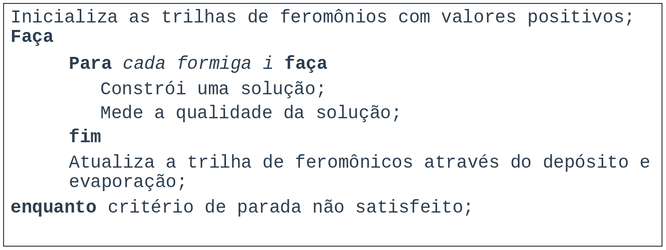

In [ ]:
#[3] Representação do mundo e processamento do algoritmo

nodes = list(range(numCities))

# Cria a representação do mundo (world) a partir dos nós (nodes) e função de distância (dist)
world = pants.World(nodes, dist)

# Cria o Solver
solver = pants.Solver()

# Busca pela melhor solução (Processamento do Algoritmo)
solution = solver.solve(world)

print('Caminho:', solution.tour)    # Nós visitados
print('Custo Total:', solution.distance) # Custo do melhor caminho encontrado

Caminho : [3, 1, 4, 5, 0, 2]
Custo Total : 189
